<a href="https://colab.research.google.com/github/mishraansh07/dogvscatCNN/blob/main/Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


/tmp/ipython-input-2225874736.py:62: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 6, 6, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

--- Training the top classifier ---
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.7586 - loss: 0.4875 - val_accuracy: 0.9730 - val_loss: 0.0926
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9463 - loss: 0.1525 - val_accuracy: 0.9790 - val_loss: 0.0659
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9500 - loss: 0.1147 - val_accuracy: 0.9760 - val_loss: 0.0602
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.9585 - loss: 0.1058 - val_accuracy: 0.9790 - val_loss: 0.0561
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9640 - loss: 0.0998 - val_accuracy: 0.9800 - val_loss: 0.0525
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9628 - loss: 0.0926 - val_accuracy: 0.9830 - val_loss: 0.0482
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9641 - loss: 0.0907 - val_accuracy: 0.9810 - val_loss: 0.0519
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9676 - lo

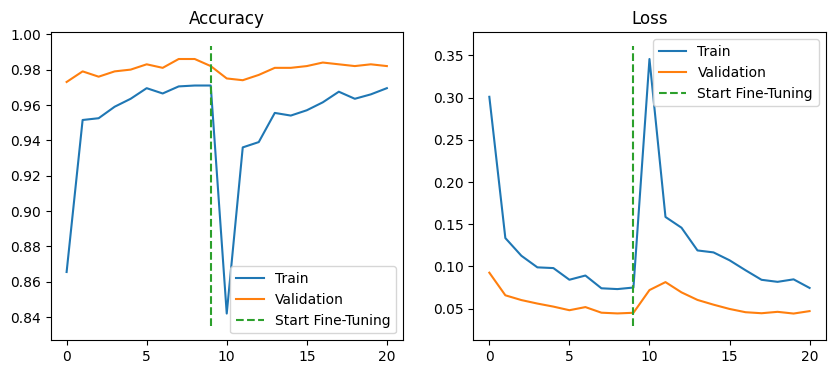

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# -----------------------------
# 1. Load Data (Slightly different setup)
# -----------------------------
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file("cats_and_dogs_filtered", origin=dataset_url, extract=True)
base_dir = os.path.join(data_dir, 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

img_height, img_width = 180, 180
batch_size = 32

# Load data WITHOUT normalizing it yet
# The pre-trained model has its own specific way of normalizing
train_data_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_data_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names BEFORE prefetching
class_names = train_data_raw.class_names

# Configure datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data_raw.prefetch(buffer_size=AUTOTUNE)
val_data = val_data_raw.prefetch(buffer_size=AUTOTUNE)


# -----------------------------
# 2. Build Transfer Learning Model
# -----------------------------

data_augmentation = models.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ],
    name="data_augmentation"
)

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# We load MobileNetV2, trained on ImageNet, without its top classifier layer
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# -----------------------------
# 3. Train Model (Phase 1: Train Classifier)
# -----------------------------
print("--- Training the top classifier ---")
EPOCHS = 10
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

# -----------------------------
# 4. Fine-Tuning (Phase 2: The final push!)
# -----------------------------
# Now, we "unfreeze" the top layers of the base model
# and train the whole thing at a very low learning rate.
# This fine-tunes the pre-trained weights to our specific dataset.

print("--- Starting Fine-Tuning ---")
base_model.trainable = True # Unfreeze the base

# Let's freeze the bottom layers and only train the top ones
fine_tune_at = 100  # Train from layer 100 onwards
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile with a very low learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # 10x smaller
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Continue training
fine_tune_epochs = 10
total_epochs = EPOCHS + fine_tune_epochs

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1] # Start where we left off
)

# -----------------------------
# 5. Evaluate and Plot
# -----------------------------
val_loss, val_acc = model.evaluate(val_data)
print(f"Final Validation Accuracy: {val_acc*100:.2f}%") # This should be 90%+

# Plot the combined history
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train')
plt.plot(val_acc, label='Validation')
plt.plot([EPOCHS-1, EPOCHS-1], plt.ylim(), label='Start Fine-Tuning', linestyle='--')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.plot([EPOCHS-1, EPOCHS-1], plt.ylim(), label='Start Fine-Tuning', linestyle='--')
plt.title('Loss')
plt.legend()
plt.show()

# -----------------------------
# 6. Predict a Single Image (Modified for new input)
# -----------------------------
def predict_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # No need to divide by 255.0 here

    prediction = model.predict(img_array)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"
    print(f"Prediction: {label} (Confidence: {prediction:.4f})")

    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
    plt.show()

# Example usage:
# predict_image(os.path.join(val_dir, "cats", "cat.2000.jpg"))
# predict_image(os.path.join(val_dir, "dogs", "dog.2000.jpg"))

Class names: ['cats', 'dogs']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


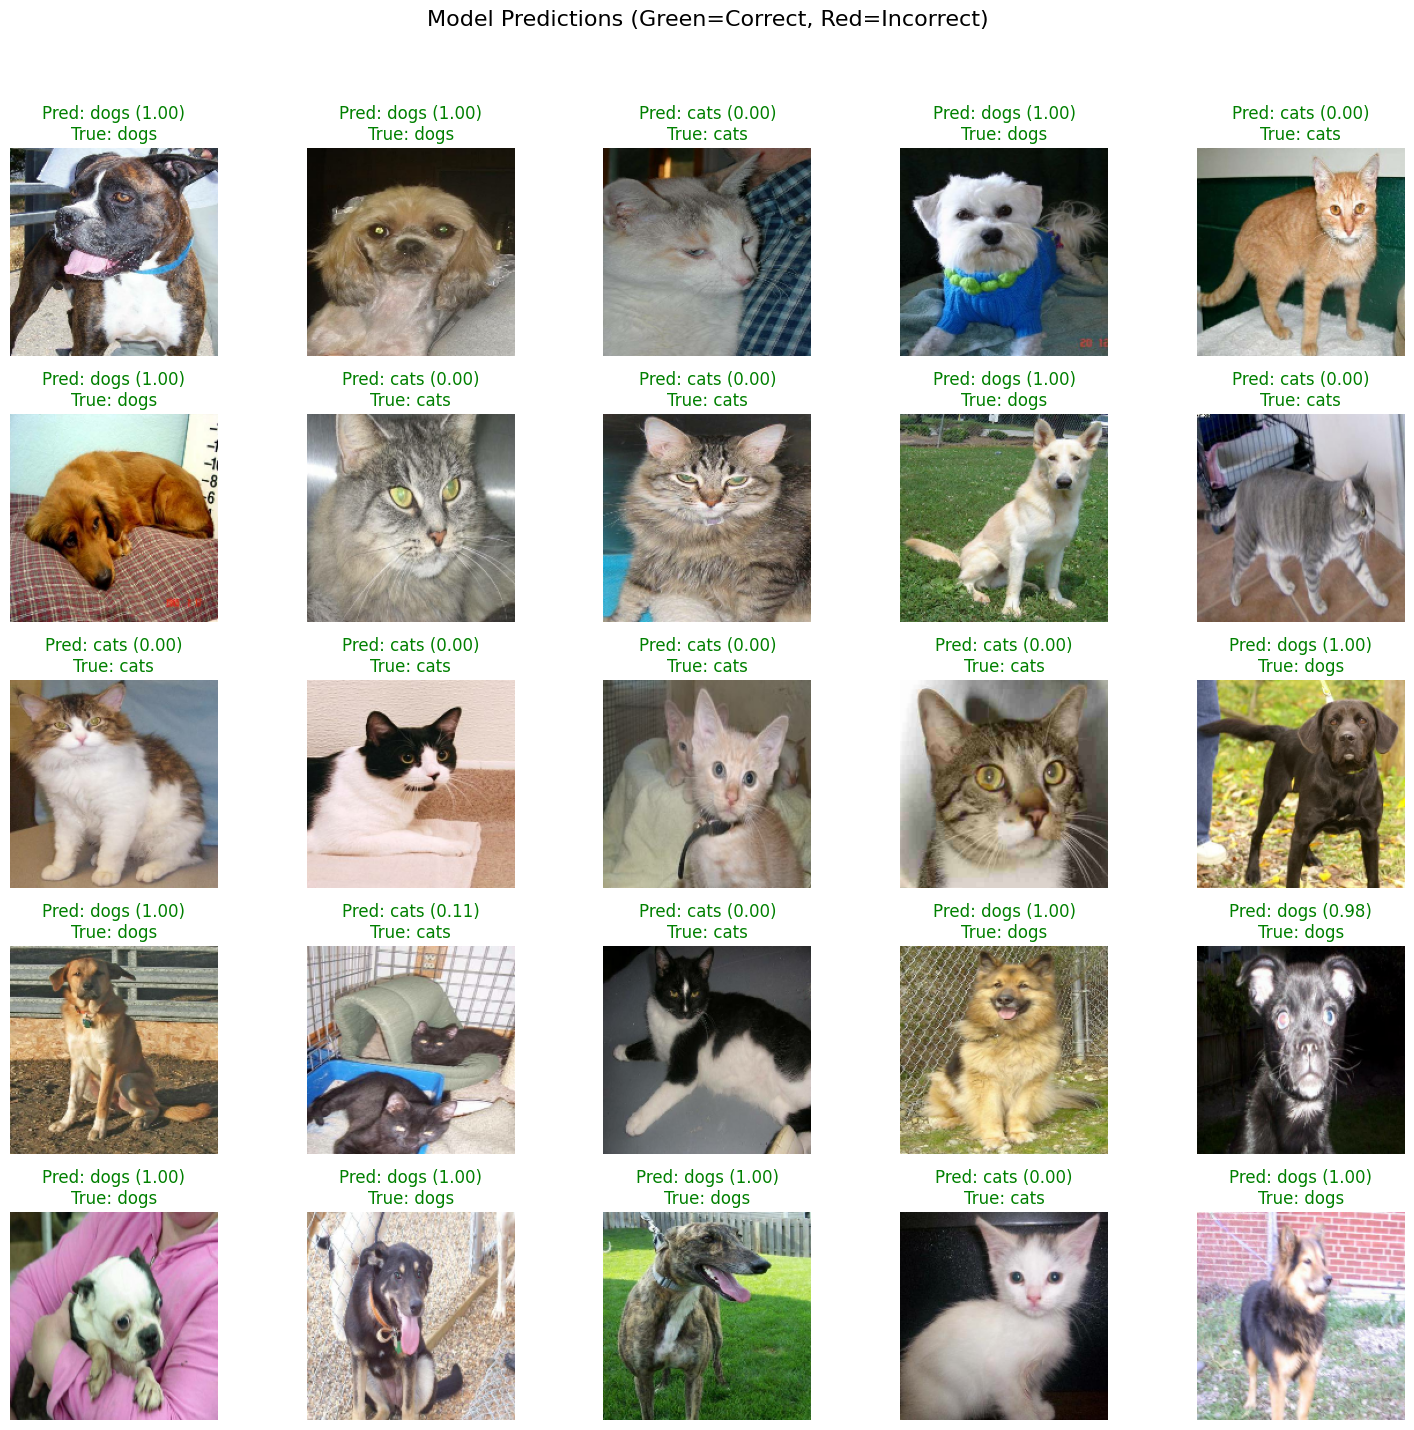

In [27]:
# -----------------------------
# 6. Predict on a Batch of Images
# -----------------------------

# Get the class names (e.g., ['cats', 'dogs'])
# class_names is now available from the previous cell

print(f"Class names: {class_names}")

# Get one batch of images and their true labels from the validation set
image_batch, label_batch = next(iter(val_data))

# Make predictions on the entire batch
predictions = model.predict(image_batch)

# Create a 5x5 grid to display the first 25 images
plt.figure(figsize=(15, 15))
plt.suptitle("Model Predictions (Green=Correct, Red=Incorrect)", fontsize=16)

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)

    # Display the image
    # We convert from Tensor to numpy array and ensure it's in uint8 format
    plt.imshow(image_batch[i].numpy().astype("uint8"))

    # --- Get Predicted Label ---
    predicted_prob = predictions[i][0]
    predicted_class_index = 1 if predicted_prob > 0.5 else 0
    predicted_label = class_names[predicted_class_index]

    # --- Get True Label ---
    true_label_index = int(label_batch[i])
    true_label = class_names[true_label_index]

    # --- Set Title and Color ---
    color = "green" if predicted_label == true_label else "red"

    plt.title(
        f"Pred: {predicted_label} ({predicted_prob:.2f})\nTrue: {true_label}",
        color=color
    )
    plt.axis("off")

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()